In [21]:
import tools as cpg
import rasterio as rs
import matplotlib.pyplot as plt
import numpy as np
import os
import geopandas as gpd
import pandas as pd

In [22]:
WBDfl = '../../gis_data/WBD_10_HU2_GDB/WBD_10_HU2_GDB.gdb'
layer = 'WBDHU12'

wbd = gpd.read_file(WBDfl, layer = layer)

In [26]:
def getHUC4(HUC12):
    return HUC12[:4]

def getToHUC4(toHUC12):
    return toHUC12[:4]

In [27]:
wbd['HUC4'] = wbd.HUC12.map(getHUC4)
wbd['ToHUC4'] = wbd.ToHUC.map(getToHUC4)

In [29]:
hu1002 = wbd.loc[wbd.HUC4 == '1002']

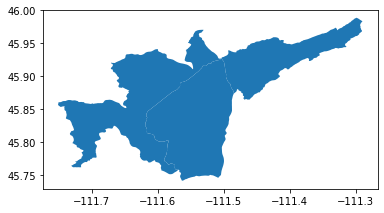

In [32]:
hu1002.loc[hu1002.ToHUC4 != '1002'].plot()

In [33]:
hu1002.loc[hu1002.ToHUC4 != '1002']['Name']

2945      City of Three Forks-Madison River
3319               Rey Creek-Gallatin River
3868    City of Three Forks-Jefferson River
Name: Name, dtype: object

In [ ]:
# for these three, restrict extents and search for pour points...
# get ride of duplicate pour points
# so it should really be from HUC12 to HUC12 that the cascade is done at...

In [30]:
hu1002.head()

,TNMID,MetaSourceID,SourceDataDesc,SourceOriginator,SourceFeatureID,LoadDate,NonContributingAreaAcres,NonContributingAreaSqKm,AreaSqKm,AreaAcres,...,States,HUC12,HUType,HUMod,ToHUC,Shape_Length,Shape_Area,geometry,HUC4,ToHUC4
2395,{568B1B72-24ED-471E-A33A-1CF762F17149},None,None,None,None,2013-01-18T07:08:32,0.0,0.0,52.82,13051.36,...,MT,100200030104,S,NM,100200030106,0.386300,0.006021,(POLYGON ((-111.9776689512119 44.9732282562342...,1002,1002
2396,{19192C38-B654-45BC-A71E-FF744F5F0FAA},None,None,None,None,2013-01-18T07:08:32,0.0,0.0,63.27,15635.39,...,MT,100200020704,S,ID,100200020705,0.476582,0.007271,(POLYGON ((-112.2981247111312 45.4298485336505...,1002,1002
2397,{B8974267-260C-4E9E-A3B1-2FBEB9627C93},None,None,None,None,2013-01-18T07:08:32,0.0,0.0,86.65,21411.79,...,MT,100200020705,S,ID,100200020706,0.615587,0.009970,(POLYGON ((-112.3402475225241 45.5202319741351...,1002,1002
2398,{626BE37A-4E20-4803-A3BC-EA35E773C3F4},None,None,None,None,2013-01-18T07:08:32,0.0,0.0,88.70,21918.10,...,MT,100200020706,S,ID,100200050102,0.660017,0.010216,(POLYGON ((-112.1490107280293 45.5726479105121...,1002,1002
2399,{B59904A5-DB91-4106-BA0B-0513D3E60CB3},None,None,None,None,2013-01-18T07:08:32,0.0,0.0,83.41,20611.15,...,MT,100200070803,S,ID,100200070804,0.666616,0.009521,(POLYGON ((-111.8159657222963 45.0634532977608...,1002,1002


In [28]:
wbd.head()

,TNMID,MetaSourceID,SourceDataDesc,SourceOriginator,SourceFeatureID,LoadDate,NonContributingAreaAcres,NonContributingAreaSqKm,AreaSqKm,AreaAcres,...,States,HUC12,HUType,HUMod,ToHUC,Shape_Length,Shape_Area,geometry,HUC4,ToHUC4
0,{8DBD31E9-3CD5-4170-97BD-3282E0C67136},{FF24B7E9-B918-4635-ADDB-267C27FDD7E0},None,None,None,2017-07-20T07:33:20,0.0,0.0,115.83,28623.13,...,CO,101900100302,S,NM,101900100303,0.609305,0.012133,(POLYGON ((-104.4268900410572 39.5759906823202...,1019,1019
1,{2A261B8E-DBEF-483A-949E-40682D53569F},{FF24B7E9-B918-4635-ADDB-267C27FDD7E0},None,None,None,2017-07-20T07:33:06,0.0,0.0,92.14,22768.22,...,CO,101900100303,S,NM,101900100304,0.540692,0.009670,(POLYGON ((-104.4160545296157 39.7514485737145...,1019,1019
2,{3FFFFB3A-D8D4-44AB-B0E7-BECB16A3B6A7},{FF24B7E9-B918-4635-ADDB-267C27FDD7E0},None,None,None,2017-07-20T07:33:06,0.0,0.0,63.43,15674.18,...,CO,101900100304,S,NM,101900100403,0.793646,0.006676,(POLYGON ((-104.2935872318891 40.0055829899866...,1019,1019
3,{7CF20964-3908-43D2-A5A1-820FFEC9BCAB},None,None,None,None,2013-01-18T07:08:08,0.0,0.0,113.19,27970.54,...,CO,101900100401,S,NM,101900100403,0.614345,0.011933,(POLYGON ((-104.2362907111448 40.0677914971818...,1019,1019
4,{5F98482E-42A3-44CC-9ADD-002B284AA1B6},None,None,None,None,2013-01-18T07:08:08,0.0,0.0,124.07,30657.22,...,CO,101900100402,S,NM,101900100403,0.729649,0.013096,(POLYGON ((-104.1128008623781 40.1851793469995...,1019,1019


In [2]:
upstream = '1002' # upstream hydrologic region
downstream = '1003' # downstream hydrologic region

In [6]:
upfdrfl = '../data/cascade_data/%s/tauFDR.tif'%upstream
dwnfdrfl = '../data/cascade_data/%s/tauFDR.tif'%downstream

cpg.tauDrainDir('../data/cascade_data/%s/fdr.tif'%upstream, upfdrfl)
cpg.tauDrainDir('../data/cascade_data/%s/fdr.tif'%downstream, dwnfdrfl)

In [9]:
# upstream files
upfacfl = '../data/cascade_data/%s/fac.tif'%(upstream)

# downstream files
dwnfacfl = '../data/cascade_data/%s/fac.tif'%(downstream)

dwnnewfacsrcfl = '../data/cascade_data/%s/fac_weight.tiff'%(downstream) # file path for the weighting grid for 
dwnnewfacfl = '../data/cascade_data/%s/fac_corr.tiff'%(downstream) # filepath for the corrected FAC.

In [10]:
cpg.tauFlowAccum(upfdrfl,upfacfl,cores=6)
cpg.tauFlowAccum(dwnfdrfl,dwnfacfl, cores=6)

Accumulating Data...
mpiexec -bind-to rr -n 6 aread8 -p ../data/cascade_data/1002/tauFDR.tif -ad8 ../data/cascade_data/1002/fac.tif -nc
Accumulating Data...
mpiexec -bind-to rr -n 6 aread8 -p ../data/cascade_data/1003/tauFDR.tif -ad8 ../data/cascade_data/1003/fac.tif -nc


In [11]:
def loadRaster(fl, returnMeta = False):
    try:
        with rs.open(fl) as src:
            dat = src.read(1)
            meta = src.meta.copy()
        
        if returnMeta:
            return dat, meta
        else:
            return dat
    except:
        print("Unable to open %s"%(fl))

In [12]:
def findLastFACFD(facfl, fl):
    '''Find the coordinate of the greatest FAC cell, return the value from the upfl at that point.
    
    This can be used to find the flow direction of the FAC cell with the greatest accumulation, or the parameter value.
    
    Parameters
    ----------
    facfl : str (path)
        Upstream FAC grid
    fl : str (path)
        Upstream 
    
    Returns
    -------
    x : float
        Horizontal coordinate of the greatest FAC cell.
    y : float
        Vertical coordinate of the greatest FAC cell.
    d : int or float
        Value from the parameter grid queried.
    w : float
        Cell size of the grid.
    '''
    
    fac,meta = loadRaster(facfl,returnMeta=True) # load the fac file
    dat = loadRaster(fl) # load the data file
    
    cx,cy = np.where(fac==fac.max()) # find the column, row cooridnates of the max fac.
    d = dat[cx,cy][0] # query the parameter grid
    
    src = rs.open(facfl) # open the fac dataset
    x,y = src.xy(cx,cy) # convert the column, row coordinates to map coordinates
    
    w = meta['transform'][0] # get the cell size of the grid
    
    return x[0],y[0],d,w

def queryPoint(x,y,grd):
    '''Query grid based on a supplied point.
    
    Parameters
    ----------
    x : float
        Horizontal coordinate in grd projection.
    y : float
        Vertical coordinate in grd projection.
    grd : str (path)
        Path to raster to query based on the supplied x and y.
        
    Returns
    -------
    value : float or int
        Value queried from the raster.
    '''
    
    with rs.open(grd) as src:
        for i in src.sample([(x,y)],1):
            return i[0]

In [13]:
def FindDownstreamCellTauDir(d,x,y,w):
    '''Find downstream cell given the flow direction of a cell using TauDEM directions.
    
    Parameters
    ----------
    d : int
        Flow direction of cell to find downstream cell of.
    x : float
        Horizontal coordinate (either projected or unprojected).
    y : float
        Vertical coordinate (either projected or unprojected).
    w : float
        Cell size in map units.
        
    Returns
    -------
    x : float
        Horizontal coordinate of the downstream cell.
    y : float
        Verital coordinate of the downstream cell.
    '''
    
    # figure out how to correct the point location
    if d == 1: # east
        dx = w
        dy = 0.
    elif d == 2: # northeast
        dx = w
        dy = w
    elif d == 3: # north
        dx = 0.
        dy = w
    elif d == 4: # northwest
        dx = w*-1.
        dy = w
    elif d == 5: # west
        dx = w*-1.
        dy = 0.
    elif d == 6: # southwest
        dx = w*-1.
        dy = w*-1.
    elif d == 7: # south
        dx = 0.
        dy = w*-1.
    elif d == 8: # southeast
        dx = w
        dy = w*-1.
        
    # update the location
    newX = x+dx
    newY = y+dy
    
    return newX,newY

In [14]:
import json

# Make it work for Python 2+3 and with Unicode
import io
try:
    to_unicode = unicode
except NameError:
    to_unicode = str

def saveJSON(dictionary, outfl):
    '''Save dictionary to JSON file.
    
    Parameters
    ----------
    dictionary : dict
        Dictionary to be saved.
    outfl : str (path)
        Path for where to generate the JSON
        
    Returns
    -------
    None
    '''
    # Write JSON file
    with io.open(outfl, 'w', encoding='utf8') as outfile:
        str_ = json.dumps(dictionary,
                      indent=4, sort_keys=True,
                      separators=(',', ': '), ensure_ascii=False)
        outfile.write(to_unicode(str_))
    
    return None

def loadJSON(infl):
    '''Load dictionary stored in a JSON file.
    
    Parameters
    ----------
    infl : str (path)
        Path to the JSON to be loaded.
        
    Returns
    -------
    dictionary : dict
        Dictionary that was loaded.
    '''
    # Read JSON file
    with open(infl) as data_file:
        dictionary = json.load(data_file)
    
    return dictionary

In [15]:
def createUpdateDict(x, y, upstreamFACmax, fromHUC, outfl):
    '''Create a dictionary for updating downstream FAC and parameter grids using values pulled from the next grid upstream.
    
    Parameters
    ----------
    x : float
        Horizontal coordinate for where the update needs to happen in the downstream grid. 
    y : float
        Vertical coordinate for where the update needs to happen in the downstream grid.
    upstreamFACmax : int
        Value to insert into the downstream FAC grid.
    fromHUC : str
        The upstream HUC that the values are coming from.
    outfl : str (path)
        Path to where to save the json of this dictionary. The convention is to name this by the downstream HUC.
    
    Returns
    -------
    updateDict : dict
        Update dictionary
    
    Outputs
    -------
    updateDict : json (dict)
        Update dictionary saved to a json at outfl.
    '''
    
    subDict = { # make dictionary for the upstream FAC
        'x': str(x),
        'y': str(y),
        'maxUpstreamFAC':str(upstreamFACmax),
        'vars':['maxUpstreamFAC'] # list of contained variables
                }
    
    if os.path.exists(outfl): # if the update dictionary exists, update it.
        print('Update dictionary found: %s'%outfl)
        updateDict = loadJSON(outfl)
        print('Updating dictionary...')
        updateDict[fromHUC] = subDict
    else:
        updateDict = {
            fromHUC : subDict
        }
        
    saveJSON(updateDict, outfl)
    
    return None

In [16]:
def updateRaster(x,y,val,grd,outgrd):
    '''Insert val into grd as location specified by x,y, writes to outgrd.
    
    Parameters
    ----------
    x : float
    y : float
        Vertical coordinate in map
    val : int or float
        Value to insert into grd
    grd : str (path)
        File path to read grd to update from.
    outgrd : str (path)
        File path to write output to.
    
    Returns
    -------
    None
    
    Output
    ------
    dat : raster
        Writes raster dataset to supplied grdout destination.
    '''
    
    dat,meta = loadRaster(grd, returnMeta=True)
    
    with rs.open(grd) as src:
        c,r = src.index(x,y) # get column, row coordinates
        
    dat[c,r] = val # update the dataset
    
    with rs.open(outgrd,'w',**meta) as dst: # open dataset for output
        dst.write(dat,1)
    
    return None

In [17]:
# Test finding facMAX and output to JSON

updateDictFl = '../data/cascade_data/%s/updateDict.json'%downstream

x,y,d,w = findLastFACFD(upfacfl, upfdrfl) # get the fdr value
maxFAC = queryPoint(x,y,upfacfl) # get the maxFAC 
newX,newY = FindDownstreamCellTauDir(d,x,y,w) # find the most upstream downstream cell.
createUpdateDict(newX,newY,maxFAC,upstream,updateDictFl)

In [18]:
def makeFACweight(inFAC,outWeight):
    '''Make FAC weighting grid of ones based on the extents of the input grid.
    
    Parameters
    ----------
    inFAC : str (path)
    outWeight : str (path)
    
    Returns
    -------
    None
    
    Output
    ------
    outWeight : raster
        Raster of the same extent and resolution as the input grid, but filled with ones where data exist. 
        No data cells are persisted.
    '''
    dat, meta = loadRaster(inFAC, returnMeta=True)
    
    ones = np.ones_like(dat) # make a grid of ones shaped like the original FAC grid. These will be used
    # as a weighting grid that can be corrected.
    
    ones[dat == meta['nodata']] = meta['nodata'] # persist the noData value into the grid
    meta['dtype'] = ones.dtype # update the datatype
    
    with rs.open(outWeight,'w',**meta) as dst:
        dst.write(ones,1)
    
    return None

In [19]:
downstreamFACweightFl = "../data/cascade_data/%s/facWeight.tif"%(downstream)
downstreamFACFl = "../data/cascade_data/%s/fac.tif"%(downstream)
updateDict = loadJSON(updateDictFl)
for key in updateDict.keys(): # for each upstream HUC.
    upstreamDict = updateDict[key]
    x = float(upstreamDict['x']) # horizontal coordinate
    y = float(upstreamDict['y']) # vertical coordinate
    if 'maxUpstreamFAC' in upstreamDict['vars']: # test if the FAC key is present, then make the weighting grid.
        upstreamFAC = int(float(upstreamDict['maxUpstreamFAC'])) # pull the upstream FAC value
        if not os.path.isfile(downstreamFACweightFl): # If weighting file not present, create one at the supplied path.
            print("Generating FAC weighting grid.")
            makeFACweight(downstreamFACFl,downstreamFACweightFl)
        if os.path.isfile(downstreamFACweightFl): # if the weighting grid is present, update it with the upstream value.
            print("Updating FAC weighting grip with value from %s FAC"%(key))
            updateRaster(x,y,upstreamFAC,downstreamFACweightFl,downstreamFACweightFl)

Generating FAC weighting grid.
Updating FAC weighting grip with value from 1002 FAC


In [113]:
upstreamDict.keys()

dict_keys(['maxUpstreamFAC', 'vars', 'x', 'y'])

In [101]:
updateDict

{'1707': {'maxUpstreamFAC': '85953890.0', 'x': '-1764120.0', 'y': '2792610.0'}}

In [56]:
# Now insert the found values into the downstream dataset
x,y,maxParam,w = findLastFACFD(upfacfl,upCPGfl) # get the max value from upstream CPG.

In [75]:
maxFAC

<generator object sample_gen at 0x7f5b81d7bdd0>

In [66]:
!pwd

/mnt/c/Users/tbarnhart/projects/ORcpgs/CPGtools


In [57]:
newX

-1764120.0

In [58]:
newY

2792610.0